# Time Series Forecasting Model Evaluation

### Imports

In [19]:
from common import (
    START_DATE,
    VQLS_WIRES,
    VQLS_WIRES,
    get_paper_data,
    rescale_paper_data,
)
from helpers import *
from abstract import ForecastingMethod
from linear_regression import LinearRegression
from neural_network import NeuralNetwork
from pqc import PQC
from vqls import VQLS

### Training & Test Data Preparation

In [20]:
# Data loading and preprocessing
(
    X,
    y,
    X_train,
    X_test,
    y_train,
    y_test,
    train_test_split_index,
    min_value,
    max_value,
    initial_value,
) = get_paper_data()

# Rescale data
ORIG_SCALED, GRAPH_SPLIT_INDEX = rescale_paper_data(
    X, y, min_value, max_value, initial_value, train_test_split_index
)

# Linear Regression

### Training - Model Creation & Weight Finding

In [21]:
lr_models = [
    (
        "Linear Regression",
        LinearRegression(
            regularization=None, fit_intercept=False, cv_folds=None
        ),
    ),
    (
        "Linear Regression with Y-Intercept",
        LinearRegression(
            regularization=None, fit_intercept=True, cv_folds=None
        ),
    ),
    (
        "L1 Regularized Linear Regression",
        LinearRegression(
            regularization="l1",
            fit_intercept=True,
            cv_folds=5,
            alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1, 5, 10, 100],
        ),
    ),
    (
        "L2 Regularized Linear Regression",
        LinearRegression(
            regularization="l2",
            fit_intercept=True,
            cv_folds=5,
            alphas=[
                0.0001,
                0.001,
                0.01,
                0.1,
                0.3,
                0.5,
                1,
                3,
                5,
                10,
                100,
            ],
        ),
    ),
]

for name, model in lr_models:
    model.train(X_train, y_train)

### Prediction - Timeseries Forecasting & Evaluation

In [22]:
for name, model in lr_models:
    print("")
    print("#" * 50)
    print(name)
    print("#" * 50)
    print(f"Training Loss (MSE): {model.score(X_train, y_train)}")
    print(f"Testing Loss (MSE): {model.score(X_test, y_test)}")
    if "alpha" in model.model.get_params():
        print(f"Best Alpha: {model.model.get_params()["alpha"]}")


##################################################
Linear Regression
##################################################
Training Loss (MSE): 0.004362187562586465
Testing Loss (MSE): 0.039515172019350626

##################################################
Linear Regression with Y-Intercept
##################################################
Training Loss (MSE): 0.0035992407468405673
Testing Loss (MSE): 0.03680124805442622

##################################################
L1 Regularized Linear Regression
##################################################
Training Loss (MSE): 0.008584740568222893
Testing Loss (MSE): 0.029688163630002172
Best Alpha: 0.01

##################################################
L2 Regularized Linear Regression
##################################################
Training Loss (MSE): 0.005564872791968336
Testing Loss (MSE): 0.029718253368471066
Best Alpha: 0.3


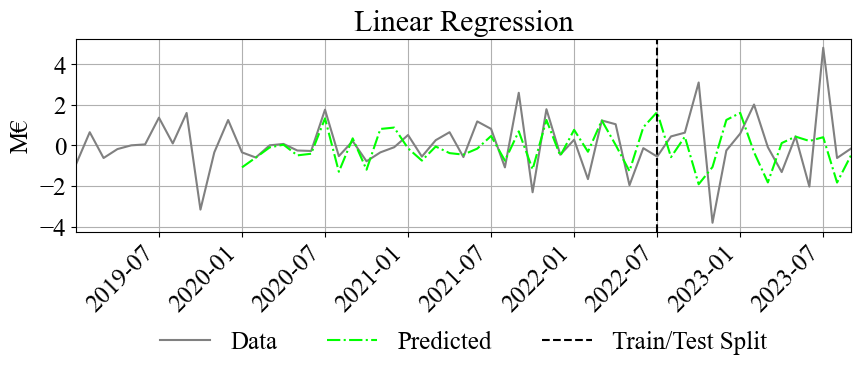

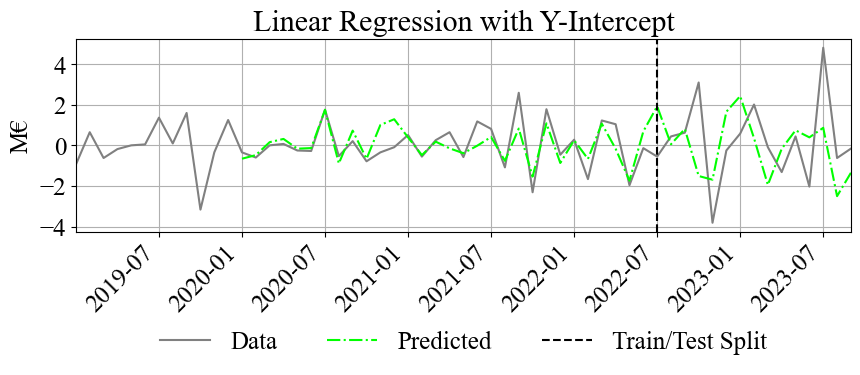

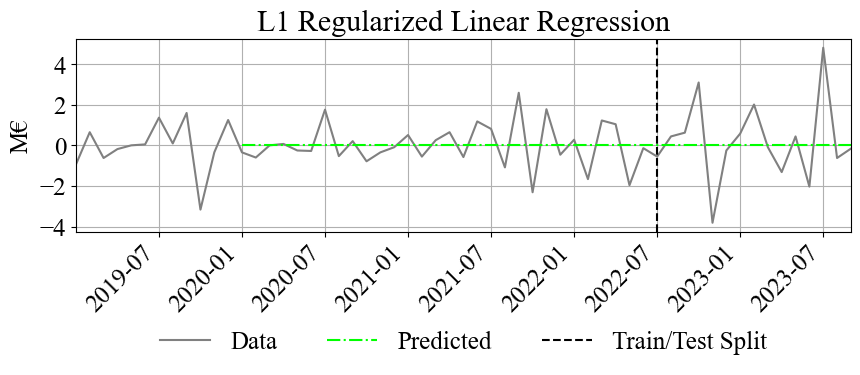

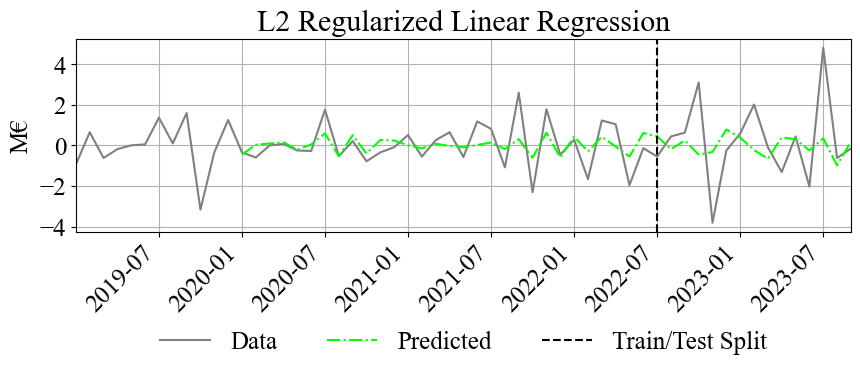

In [23]:
for name, model in lr_models:
    # Post process predictions
    X_pred_scaled = ForecastingMethod.post_process_data(
        model.predict(X),
        min_value,
        max_value,
        initial_value,
        scale_to_range=True,
    )

    plot_sales_growth(
        START_DATE,
        ORIG_SCALED,
        X_pred_scaled,
        pred_linestyle="-.",
        pred_color="lime",
        title=name,
        train_test_split=GRAPH_SPLIT_INDEX,
    )

# Neural Network

### Training - Model Creation & Weight Finding

In [24]:
nn = NeuralNetwork(epochs=300)
nn.train(X_train, y_train)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0088
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0078
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0063
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0066
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0068
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 
Epoch 16/300
4/4 ━━

### Prediction - Timeseries Forecasting & Evaluation

In [25]:
print(f"Training Loss (MSE): {nn.score(X_train, y_train)}")
print(f"Testing Loss (MSE): {nn.score(X_test, y_test)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Training Loss (MSE): 5.937676768800887e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Testing Loss (MSE): 0.03723947415863068


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


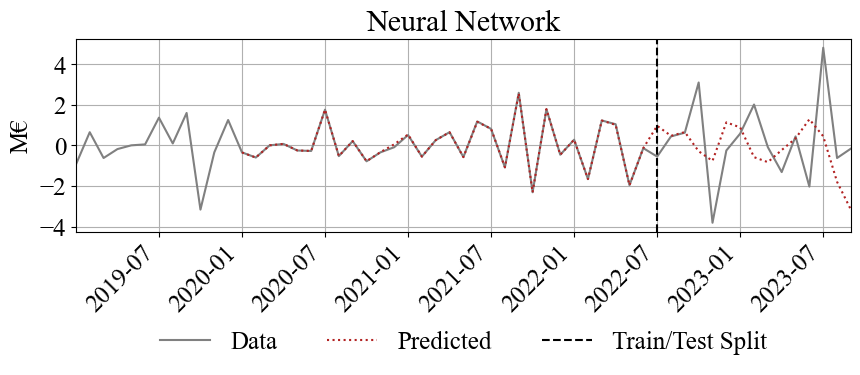

In [26]:
# Post process predictions
X_pred_scaled = ForecastingMethod.post_process_data(
    nn.predict(X), min_value, max_value, initial_value, scale_to_range=True
)

plot_sales_growth(
    START_DATE,
    ORIG_SCALED,
    X_pred_scaled,
    pred_linestyle=":",
    pred_color="firebrick",
    title="Neural Network",
    train_test_split=GRAPH_SPLIT_INDEX,
)

# PQC

### Training - Model Creation & Weight Finding

In [27]:
N_WIRES = 12
N_LAYERS = 2

# Load the model - since training takes 30+ minutes
pqc_model_lbfgsb = PQC.load_model("../models/pqc_lbfgsb.pkl")
pqc_model_cobyla = PQC.load_model("../models/pqc_cobyla.pkl")

### Circuit Diagram

(<Figure size 1100x1300 with 1 Axes>, <Axes: >)

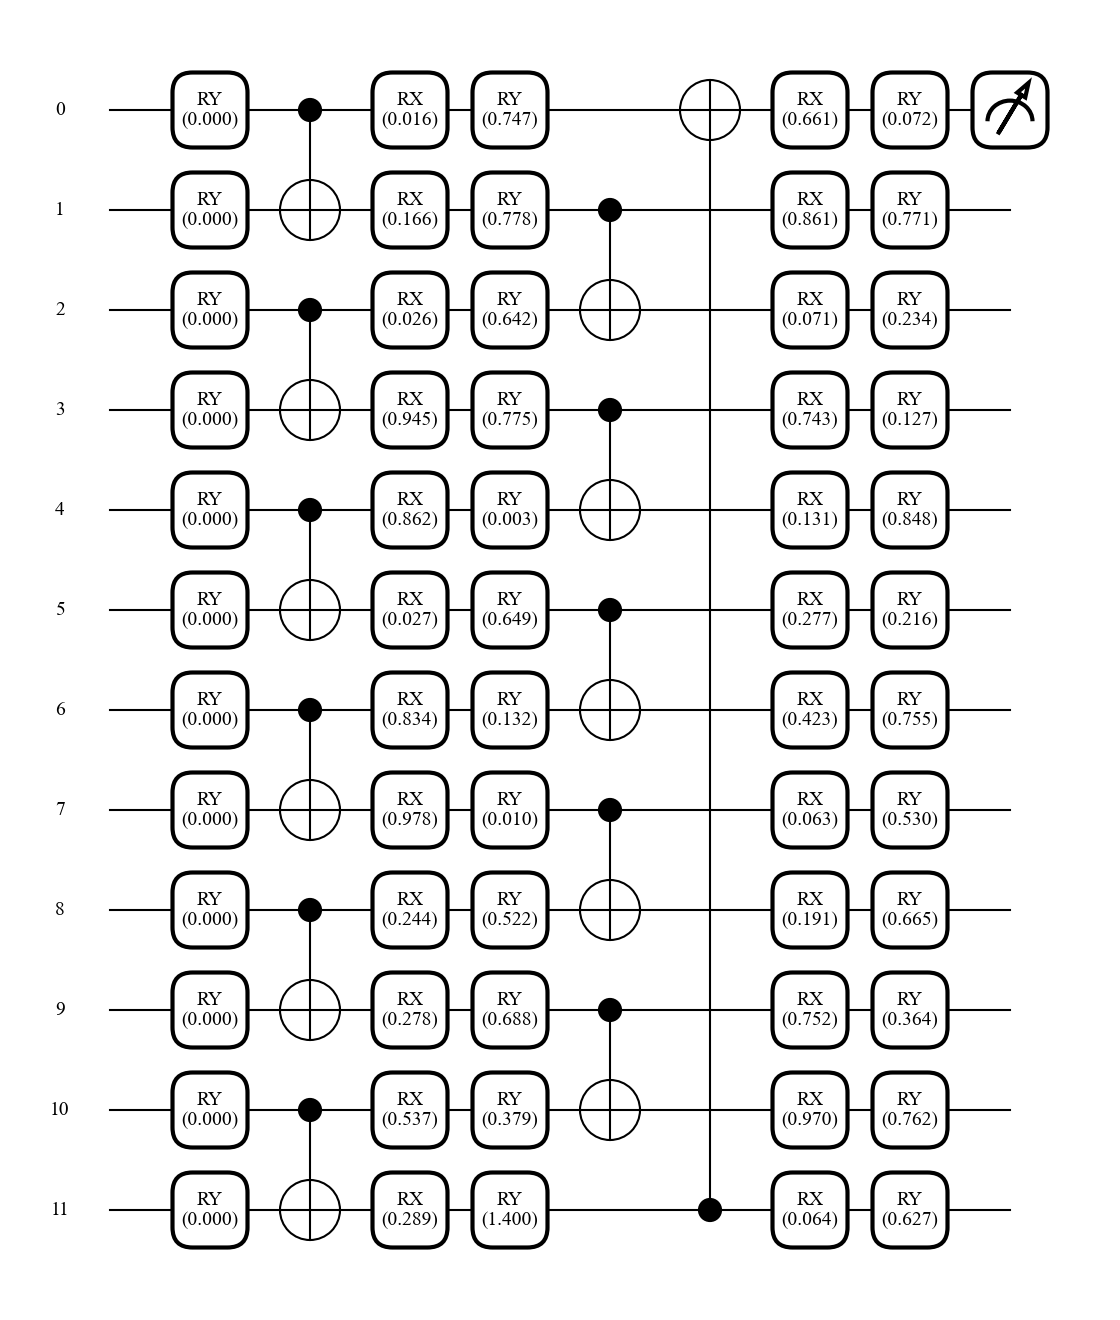

In [28]:
pqc_model_lbfgsb.draw_circuit()

### Prediction - Timeseries Forecasting & Evaluation

In [29]:
print("#" * 50)
print("PQC with L-BFGS-B Optimizer")
print("#" * 50)
print(f"Training Loss (MSE): {pqc_model_lbfgsb.score(X_train, y_train)}")
print(f"Testing Loss (MSE): {pqc_model_lbfgsb.score(X_test, y_test)}")
print("")
print("#" * 50)
print("PQC with COBYLA Optimizer")
print("#" * 50)
print(f"Training Loss (MSE): {pqc_model_cobyla.score(X_train, y_train)}")
print(f"Testing Loss (MSE): {pqc_model_cobyla.score(X_test, y_test)}")

##################################################
PQC with L-BFGS-B Optimizer
##################################################
Training Loss (MSE): 0.005816286592813353
Testing Loss (MSE): 0.025949138609661696

##################################################
PQC with COBYLA Optimizer
##################################################
Training Loss (MSE): 0.006778972543673518
Testing Loss (MSE): 0.02514973019331011


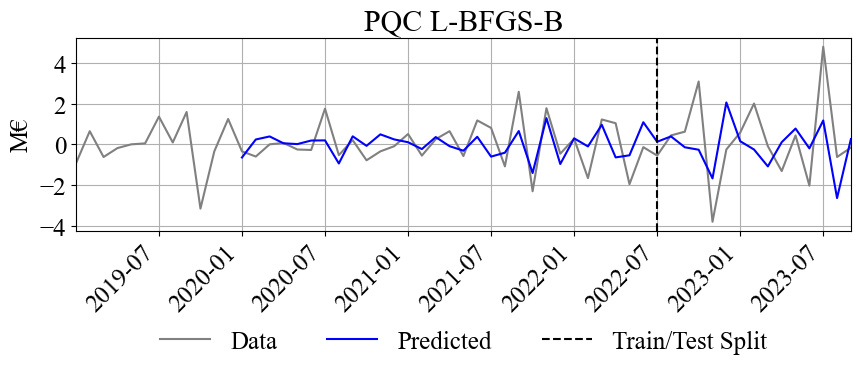

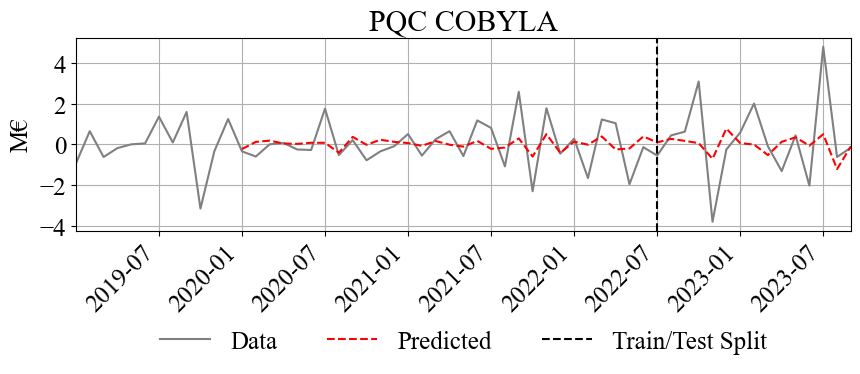

In [30]:
# Post process predictions
predictions_L_scaled = ForecastingMethod.post_process_data(
    pqc_model_lbfgsb.predict(X),
    min_value,
    max_value,
    initial_value,
    scale_to_range=True,
)
predictions_C_scaled = ForecastingMethod.post_process_data(
    pqc_model_cobyla.predict(X),
    min_value,
    max_value,
    initial_value,
    scale_to_range=True,
)

# Plot the results
plot_sales_growth(
    START_DATE,
    ORIG_SCALED,
    predictions_L_scaled,
    pred_linestyle="-",
    pred_color="blue",
    title="PQC L-BFGS-B",
    train_test_split=GRAPH_SPLIT_INDEX,
)
plot_sales_growth(
    START_DATE,
    ORIG_SCALED,
    predictions_C_scaled,
    pred_linestyle="--",
    pred_color="red",
    title="PQC COBYLA",
    train_test_split=GRAPH_SPLIT_INDEX,
)

# Training & Test Data Preparation (Smaller Window)

In [31]:
# Data loading and preprocessing
(
    X,
    y,
    X_train,
    X_test,
    y_train,
    y_test,
    train_test_split_index,
    min_value,
    max_value,
    initial_value,
) = get_paper_data(window_size=2**VQLS_WIRES)

# Rescale data
ORIG_SCALED, GRAPH_SPLIT_INDEX = rescale_paper_data(
    X,
    y,
    min_value,
    max_value,
    initial_value,
    train_test_split_index,
    2**VQLS_WIRES,
)

# VQLS

### Training - Model Creation & Weight Finding

In [32]:
# Load the model - since training takes 10+ minutes for 2 qubits
vqls = VQLS.load_model("../models/vqls.pkl")

# Train the comparison linear regression model
lr_vqls = LinearRegression(regularization=None, fit_intercept=False)
lr_vqls.train(X_train, y_train)

### Prediction - Timeseries Forecasting & Evaluation

In [33]:
print(f"Training Loss (MSE): {vqls.score(X_train, y_train)}")
print(f"Testing Loss (MSE): {vqls.score(X_test, y_test)}")

Training Loss (MSE): 0.008503909096140789
Testing Loss (MSE): 0.029711993659946853


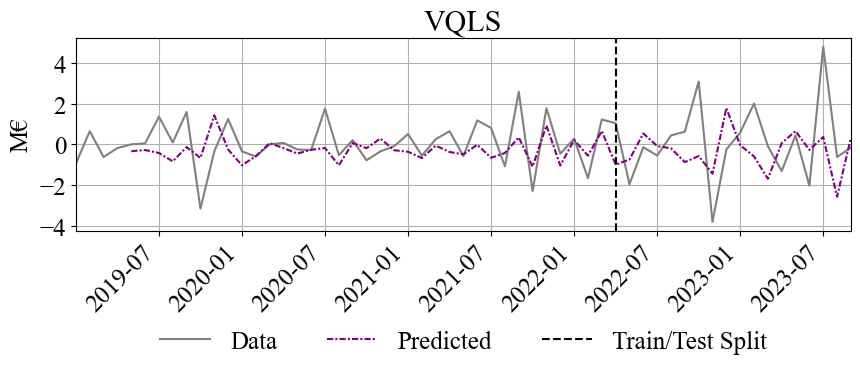

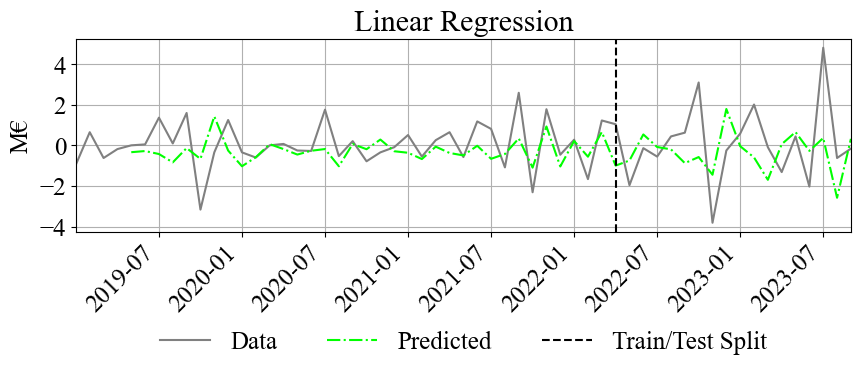

In [34]:
# Post process predictions
X_pred_scaled = ForecastingMethod.post_process_data(
    vqls.predict(X), min_value, max_value, initial_value, scale_to_range=True
)

plot_sales_growth(
    START_DATE,
    ORIG_SCALED,
    X_pred_scaled,
    pred_linestyle=(0, (3, 1, 1, 1)),
    pred_color="purple",
    title="VQLS",
    train_test_split=GRAPH_SPLIT_INDEX,
    window_size=(2**VQLS_WIRES),
)

X_pred_scaled = ForecastingMethod.post_process_data(
    lr_vqls.predict(X),
    min_value,
    max_value,
    initial_value,
    scale_to_range=True,
)
plot_sales_growth(
    START_DATE,
    ORIG_SCALED,
    X_pred_scaled,
    pred_linestyle="-.",
    pred_color="lime",
    title="Linear Regression",
    train_test_split=GRAPH_SPLIT_INDEX,
    window_size=(2**VQLS_WIRES),
)

# Training Loss Over Iterations

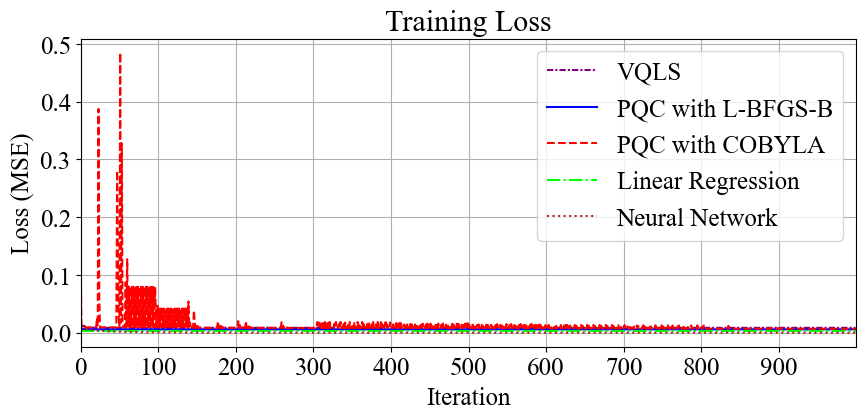

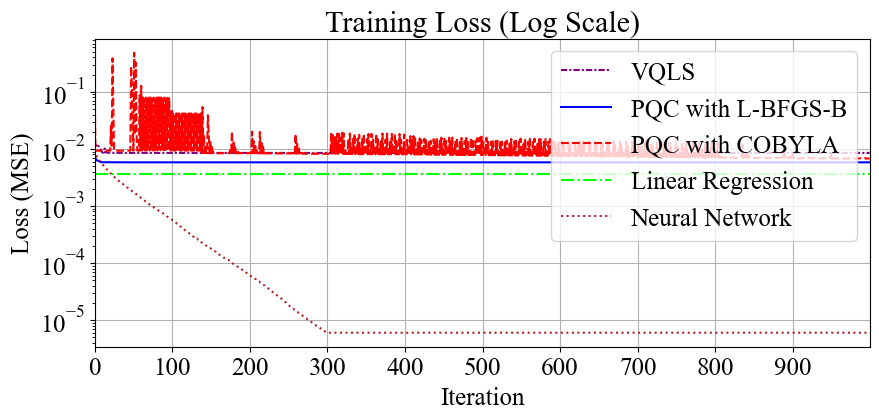

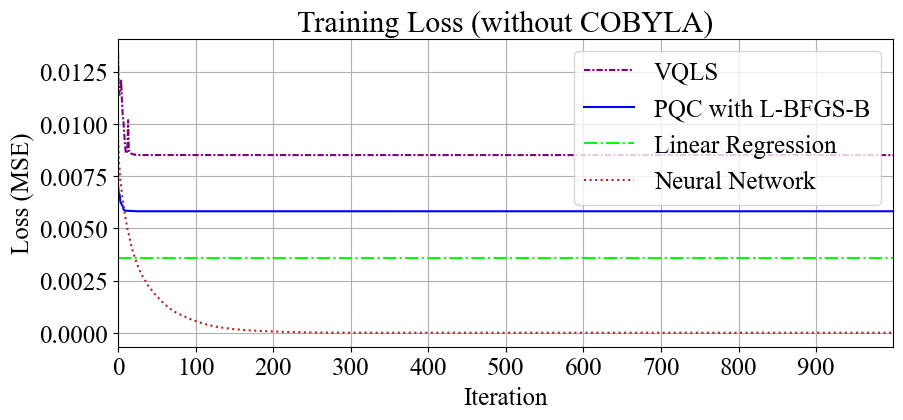

In [35]:
lr = lr_models[1][1]

plot_loss(
    list(range(1000)),
    lr.mse_iterations,
    nn.mse_iterations,
    pqc_model_lbfgsb.mse_iterations,
    pqc_model_cobyla.mse_iterations,
    vqls.mse_iterations,
    title="Training Loss",
)

plot_loss(
    list(range(1000)),
    lr.mse_iterations,
    nn.mse_iterations,
    pqc_model_lbfgsb.mse_iterations,
    pqc_model_cobyla.mse_iterations,
    vqls.mse_iterations,
    title="Training Loss (Log Scale)",
    yscale="log",
)

plot_loss(
    list(range(1000)),
    lr.mse_iterations,
    nn.mse_iterations,
    pqc_model_lbfgsb.mse_iterations,
    None,
    vqls.mse_iterations,
    title="Training Loss (without COBYLA)",
)